### A Look into Freaky Franchise's Rotten Tomato Competition

Podcasts are all the rage, especially in these weird times where many people have more free time than they did in the past. Today we are going to look at some gathered data from one particular podcast, Freaky Franchise where they "unmask horror movies based on quantity over quality." I strongly suggest checking [Freaky Franchise](http://freakyfranchise.com/about) out if you are into horror movies.

The first part of the episode the two hosts have a friendly competition where they guess the Rotten Tomato scores of the movies they are discussing, the loser having to sum the movie up in under a minute. In this post, we are going to look data surrounding this competition to see if we can predict which host will "win" the competition on any particular episode.

### First, we need to load in the data set and see what we are working with

In [1]:
import pandas as pd
ff_data = pd.read_csv('Freaky_Franchise_data.csv')
ff_data

,#,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner,Notes
0,1,Scream,8/18/2017,84,86,2,79,Cordie,Cordie,NaN
1,2,Scream 2,9/1/2017,85,70,15,81,Cordie,Cordie,NaN
2,3,Scream 3,9/15/2017,74,40,34,36,Cordie,Theo,NaN
3,4,Scream 4,9/29/2017,62,68,6,59,Cordie,Cordie,NaN
4,5,Scream Wrap-UP,10/20/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70,70,Jaws 2,7/3/2020,31,43,12,60,Cordie,Theo,NaN
71,71,Jaws 3(D),7/17/2020,31,17,14,13,Cordie,Theo,NaN
72,NaN,Number of Wins,NaN,21,37,41,Number of times guess is within 10,NaN,NaN,NaN
73,NaN,Win Percentage,NaN,35%,63%,69%,Percentage of guesses within 10,NaN,NaN,NaN


In [2]:
# Let's take a look at the data type of the columns and where we have null values
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
#                       72 non-null object
Episode Title           75 non-null object
Date Aired              72 non-null object
Cordie                  63 non-null object
Theo                    63 non-null object
Difference in scores    62 non-null object
RT Score                62 non-null object
Goes First              60 non-null object
Winner                  60 non-null object
Notes                   9 non-null object
dtypes: object(10)
memory usage: 6.0+ KB


From this summery we can see a few things we will have to do to the DataFrame before we start using it to create statistical information.
- First see that we can reset the index.
- It seems like there is a second table on the bottom that we should remove before continuing
- We can see that Cordie, Theo, the Difference in scores, and the RT scores are listed as objects while we will need them as floats or integers
- In the same vein of above, we may want to convert Date Aired to DateTime.
- We also see that there are some null values that we will have to deal with


### Scrubbing the data for modeling

#### First we are going to drop the extra table on the bottom. 

In [3]:
# Dropping the rows without an index (episode number) by telling pandas to just keep rows that
# the episode number is not empty.
ff_data = ff_data[ff_data['#'].notna()]
ff_data.tail()

,#,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner,Notes
67,67,The First Purge,5/15/2020,47,43,4,55,Cordie,Cordie,NaN
68,68,The Purge Retropective,5/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,69,Jaws,6/19/2020,92,91,1,98,Cordie,Cordie,Cordie Changes her guess
70,70,Jaws 2,7/3/2020,31,43,12,60,Cordie,Theo,NaN
71,71,Jaws 3(D),7/17/2020,31,17,14,13,Cordie,Theo,NaN


#### First, we can set the index to the episode number

In [4]:
ff_data.set_index("#", inplace=True)
ff_data

,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner,Notes
#,,,,,,,,,
1,Scream,8/18/2017,84,86,2,79,Cordie,Cordie,NaN
2,Scream 2,9/1/2017,85,70,15,81,Cordie,Cordie,NaN
3,Scream 3,9/15/2017,74,40,34,36,Cordie,Theo,NaN
4,Scream 4,9/29/2017,62,68,6,59,Cordie,Cordie,NaN
5,Scream Wrap-UP,10/20/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
67,The First Purge,5/15/2020,47,43,4,55,Cordie,Cordie,NaN
68,The Purge Retropective,5/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Jaws,6/19/2020,92,91,1,98,Cordie,Cordie,Cordie Changes her guess


#### Let's look at the null values and decide what to do with them

In [5]:
ff_data.isnull().sum()

Episode Title            0
Date Aired               0
Cordie                  12
Theo                    12
Difference in scores    12
RT Score                12
Goes First              12
Winner                  12
Notes                   63
dtype: int64

4 of these columns have the same amount of null values. This could be a coincidence or the null values could be in the same row. We should look deeper into that since it could help us decide how we deal with the null values.

In [6]:
# First we are going to just look at rows that have null values
ff_data[ff_data.isnull().any(axis=1)]

,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner,Notes
#,,,,,,,,,
1,Scream,8/18/2017,84,86,2,79,Cordie,Cordie,NaN
2,Scream 2,9/1/2017,85,70,15,81,Cordie,Cordie,NaN
3,Scream 3,9/15/2017,74,40,34,36,Cordie,Theo,NaN
4,Scream 4,9/29/2017,62,68,6,59,Cordie,Cordie,NaN
5,Scream Wrap-UP,10/20/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
66,The Purge Election Year,4/24/2020,67,50,17,56,Cordie,Theo,NaN
67,The First Purge,5/15/2020,47,43,4,55,Cordie,Cordie,NaN
68,The Purge Retropective,5/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# This produced more rows than we wanted. We want to see if the 12 in are the same
# To check this we are going to create a new df without notes
no_notes = ff_data.copy()
no_notes.drop(labels='Notes', axis=1, inplace=True)
no_notes.head()

,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner
#,,,,,,,,
1,Scream,8/18/2017,84,86,2,79,Cordie,Cordie
2,Scream 2,9/1/2017,85,70,15,81,Cordie,Cordie
3,Scream 3,9/15/2017,74,40,34,36,Cordie,Theo
4,Scream 4,9/29/2017,62,68,6,59,Cordie,Cordie
5,Scream Wrap-UP,10/20/2017,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# run the same code again with no_notes to see all rows with null values
no_notes[no_notes.isnull().any(axis=1)]

,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner
#,,,,,,,,
5,Scream Wrap-UP,10/20/2017,NaN,NaN,NaN,NaN,NaN,NaN
15,Halloween Retrospective,3/2/2018,NaN,NaN,NaN,NaN,NaN,NaN
19,The Ring Retrospective,5/18/2018,NaN,NaN,NaN,NaN,NaN,NaN
25,Sleepaway Camp Retrospective,8/17/2018,NaN,NaN,NaN,NaN,NaN,NaN
29,I Know What You Did Last Summer Retrospective,10/12/2018,NaN,NaN,NaN,NaN,NaN,NaN
38,A Nightmare on Elm Street Retrospective,2/22/2019,NaN,NaN,NaN,NaN,NaN,NaN
44,Final Destination Retrospective,5/24/2019,NaN,NaN,NaN,NaN,NaN,NaN
50,Our 50th Episode Spectacular!,8/16/2019,NaN,NaN,NaN,NaN,NaN,NaN
54,The Halloween Special,10/11/2019,NaN,NaN,NaN,NaN,NaN,NaN


We can see that like we suspected, the 12 null values all fall on the same rows. These episodes are mostly retrospectives and specials which we can guess (and I can confirm from listening to them) did not include the competition. Since the main thing we are looking at in this blog is the Rotten Tomato competition, we can safely drop these rows without loss of data. 

In [9]:
# Using the same method we used to remove the extra table
# Since the null values fall across the row, we just need to choose one column
ff_data = ff_data[ff_data['Cordie'].notna()]
ff_data.head()

,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner,Notes
#,,,,,,,,,
1,Scream,8/18/2017,84,86,2,79,Cordie,Cordie,NaN
2,Scream 2,9/1/2017,85,70,15,81,Cordie,Cordie,NaN
3,Scream 3,9/15/2017,74,40,34,36,Cordie,Theo,NaN
4,Scream 4,9/29/2017,62,68,6,59,Cordie,Cordie,NaN
6,Halloween,10/27/2017,81,85,4,93,Cordie,Theo,NaN


In [10]:
# Let's look at ff_data.info() again to check it worked
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 71
Data columns (total 9 columns):
Episode Title           60 non-null object
Date Aired              60 non-null object
Cordie                  60 non-null object
Theo                    60 non-null object
Difference in scores    60 non-null object
RT Score                60 non-null object
Goes First              60 non-null object
Winner                  60 non-null object
Notes                   9 non-null object
dtypes: object(9)
memory usage: 4.7+ KB


#### Now that we have the data we will be working with, we need to convert it into a format we can work with

In [11]:
# Using a for loop we will convert all into float 

# First, create a list of the column names that we need to convert
columns = ['Cordie', 'Theo', 'Difference in scores', 'RT Score']

# Use a for loop to loop through columns to convert any columns that can be into floats
for x in columns:
    ff_data[x] = pd.to_numeric(ff_data[x], errors='coerce')

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 71
Data columns (total 9 columns):
Episode Title           60 non-null object
Date Aired              60 non-null object
Cordie                  60 non-null int64
Theo                    59 non-null float64
Difference in scores    59 non-null float64
RT Score                59 non-null float64
Goes First              60 non-null object
Winner                  60 non-null object
Notes                   9 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 4.7+ KB


Here we can see that 'Theo', 'Difference in scores', and 'RT Score' have one less non-null object than before. That mean most likely there was a non-number filler which we converted to a null value when we coerced the errors. Seeing that, we will need to check for null values again and decide what to do with them.

In [13]:
# Checking again for nulls using the same method as above
no_notes = ff_data.copy()
no_notes.drop(labels='Notes', axis=1, inplace=True)
no_notes[no_notes.isnull().any(axis=1)]

,Episode Title,Date Aired,Cordie,Theo,Difference in scores,RT Score,Goes First,Winner
#,,,,,,,,
23,Sleepaway Camp IV,7/15/2018,0,4.0,4.0,NaN,Cordie,Cordie
51,Friday the 13th Part VI - Jason Lives,8/30/2019,36,NaN,NaN,52.0,Cordie,Theo


It looks like there is one episode where Theo's guess is not listed and thus the difference is not listed and another episode where no Rotten Tomato Score is listed. Both of these episodes have winners so we shouldn't get drop them right out. Since it is just three null values, we are going replace the null values with probable answers using the other data we have.

In [14]:
# Since Cordie won the Sleepaway Camp IV with a guess of zero and simple search, I
# found that the movie does not have a RT score so we will replace the null with a 0
ff_data['RT Score'] = ff_data['RT Score'].fillna(0)

# For Jason Lives, we know Theo wins so we will fill it with with the RT Score
# Then fill difference with the difference between it and Cordie's guess
ff_data['Theo'] = ff_data['Theo'].fillna(ff_data['RT Score'])
ff_data['Difference in scores'] = ff_data['Difference in scores'].fillna(
                                   abs(ff_data['Cordie'] - ff_data['Theo']))

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be 

In [15]:
# Check for nulls once again
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 71
Data columns (total 9 columns):
Episode Title           60 non-null object
Date Aired              60 non-null object
Cordie                  60 non-null int64
Theo                    60 non-null float64
Difference in scores    60 non-null float64
RT Score                60 non-null float64
Goes First              60 non-null object
Winner                  60 non-null object
Notes                   9 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 4.7+ KB


#### One last thing we will do before we start running test and models is create boolean columns of who went first and who won using one-hot encoding.

In [16]:
ff_data.columns = ff_data.columns.str.replace(' ', '_')
ff_data.head()

,Episode_Title,Date_Aired,Cordie,Theo,Difference_in_scores,RT_Score,Goes_First,Winner,Notes
#,,,,,,,,,
1,Scream,8/18/2017,84,86.0,2.0,79.0,Cordie,Cordie,NaN
2,Scream 2,9/1/2017,85,70.0,15.0,81.0,Cordie,Cordie,NaN
3,Scream 3,9/15/2017,74,40.0,34.0,36.0,Cordie,Theo,NaN
4,Scream 4,9/29/2017,62,68.0,6.0,59.0,Cordie,Cordie,NaN
6,Halloween,10/27/2017,81,85.0,4.0,93.0,Cordie,Theo,NaN


In [18]:
# We are just going to keep the columns with data that will affect the model
feats = ['Cordie','Theo','Difference_in_scores','RT_Score','Goes_First', 'Winner']
ff_data = ff_data[feats]
ff_data = pd.get_dummies(ff_data, drop_first=True)
ff_data

,Cordie,Theo,Difference_in_scores,RT_Score,Goes_First_Theo,Winner_Theo,Winner_Tie
#,,,,,,,
1,84,86.0,2.0,79.0,0,0,0
2,85,70.0,15.0,81.0,0,0,0
3,74,40.0,34.0,36.0,0,1,0
4,62,68.0,6.0,59.0,0,0,0
6,81,85.0,4.0,93.0,0,1,0
7,37,34.0,3.0,31.0,0,1,0
8,33,43.0,10.0,37.0,0,0,0
9,62,42.0,20.0,29.0,0,1,0
10,89,93.0,4.0,92.0,0,1,0


### Exploring the Data

In [19]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [20]:
ff_data.describe()

,Cordie,Theo,Difference_in_scores,RT_Score,Goes_First_Theo,Winner_Theo,Winner_Tie
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,46.200000,46.516667,7.916667,43.516667,0.050000,0.616667,0.033333
std,26.413145,25.133873,6.354744,27.111503,0.219784,0.490301,0.181020
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,27.500000,3.000000,20.000000,0.000000,0.000000,0.000000
50%,37.000000,42.500000,6.500000,37.500000,0.000000,1.000000,0.000000
75%,70.250000,65.000000,12.000000,62.250000,0.000000,1.000000,0.000000
max,93.000000,95.000000,34.000000,98.000000,1.000000,1.000000,1.000000


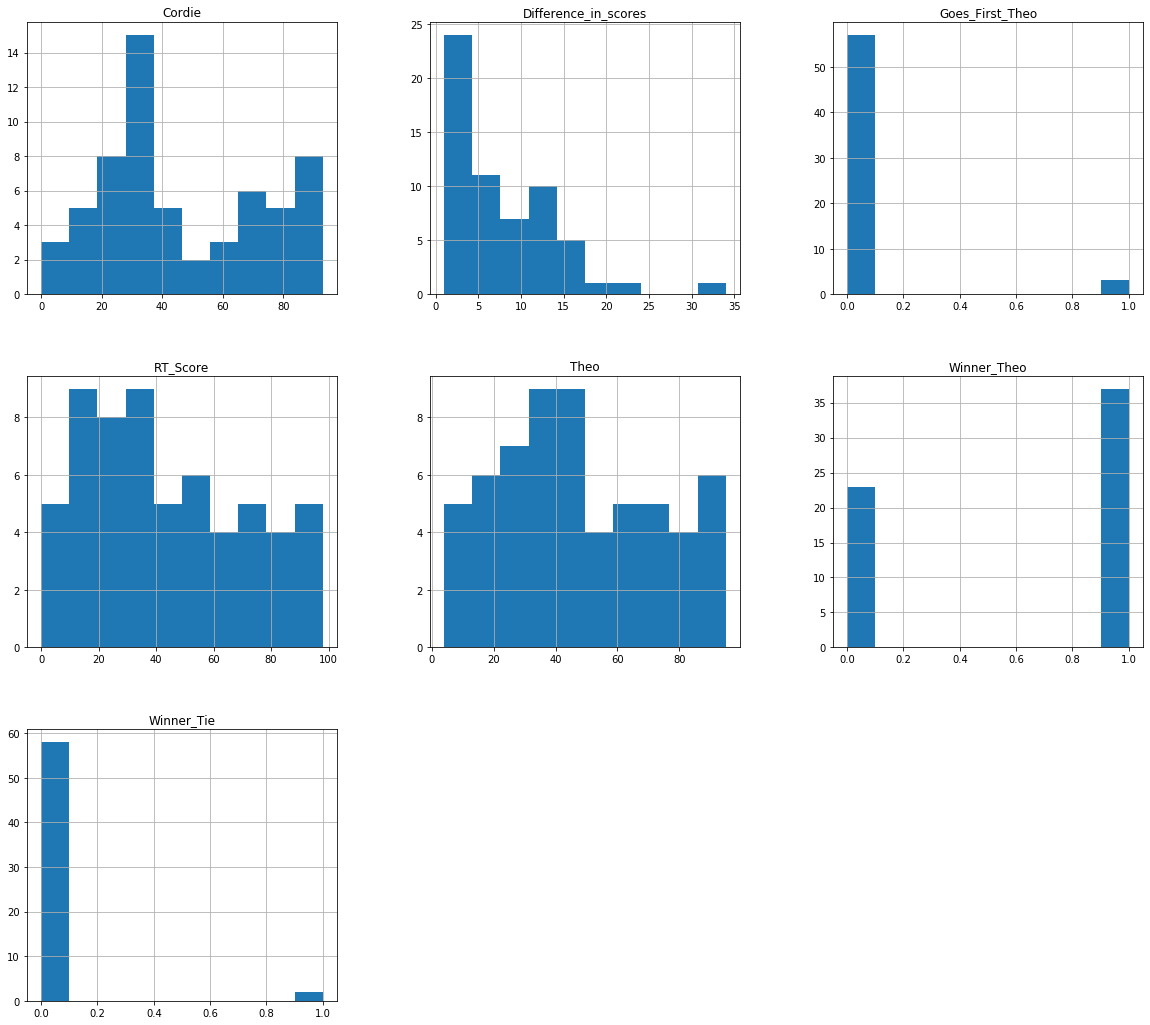

In [21]:
ff_data.hist(figsize = (20,18));

In [22]:
feats = ['Cordie','Theo','Difference_in_scores','RT_Score','Goes_First_Theo']
corr = ff_data[feats].corr()
corr

,Cordie,Theo,Difference_in_scores,RT_Score,Goes_First_Theo
Cordie,1.000000,0.922891,-0.120670,0.756044,-0.182770
Theo,0.922891,1.000000,-0.225652,0.853903,-0.102940
Difference_in_scores,-0.120670,-0.225652,1.000000,-0.158822,0.075846
RT_Score,0.756044,0.853903,-0.158822,1.000000,-0.149476
Goes_First_Theo,-0.182770,-0.102940,0.075846,-0.149476,1.000000


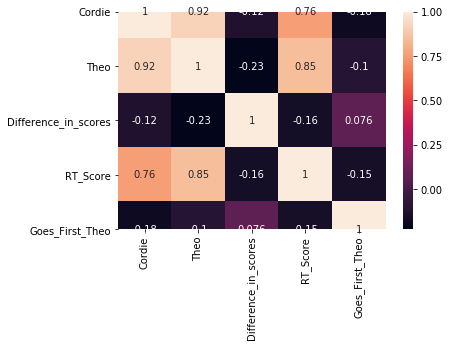

In [23]:
sns.heatmap(corr, annot=True);

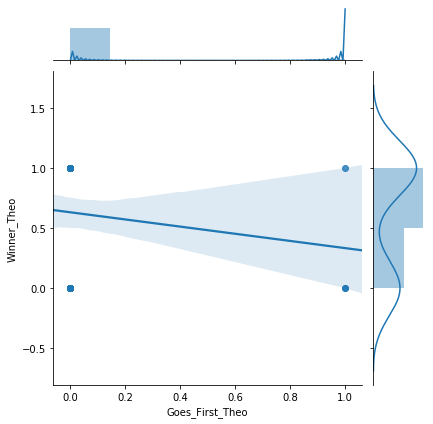

In [24]:
sns.jointplot('Goes_First_Theo','Winner_Theo', data=ff_data, kind='reg');

## Finally we can model the data and see what relationships we have between winning

In [25]:
# Define the problem
outcome = 'Winner_Theo'
x_cols = list(ff_data.columns)
x_cols.remove(outcome)

In [26]:
# Some brief preprocessing
ff_data.columns = [col.replace(' ', '_') for col in ff_data.columns]
for col in x_cols:
    ff_data[col] = (ff_data[col] - ff_data[col].mean())/ff_data[col].std()
ff_data.head()

,Cordie,Theo,Difference_in_scores,RT_Score,Goes_First_Theo,Winner_Theo,Winner_Tie
#,,,,,,,
1,1.431106,1.570921,-0.931063,1.308793,-0.227496,0,-0.184141
2,1.468966,0.934330,1.114653,1.382562,-0.227496,0,-0.184141
3,1.052506,-0.259278,4.104545,-0.277250,-0.227496,1,-0.184141
4,0.598187,0.854756,-0.301612,0.571098,-0.227496,0,-0.184141
6,1.317526,1.531134,-0.616337,1.825179,-0.227496,1,-0.184141


In [27]:
from statsmodels.formula.api import ols

In [28]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=ff_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Winner_Theo   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.509
Date:                Thu, 30 Jul 2020   Prob (F-statistic):              0.193
Time:                        17:51:29   Log-Likelihood:                -37.137
No. Observations:                  60   AIC:                             88.27
Df Residuals:                      53   BIC:                             102.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6167      0.062      9.991      0.000       0.493       0.740
Cordie                   0.1868      0.176      1.060      0.294      -0.167       0.540
Theo                    -0.2817      0.224     -1.255      0.215      -0.732       0.168
Difference_in_scores     0.0780      0.068      1.151      0.255      -0.058       0.214
RT_Score                 0.1184      0.124      0.954      0.344      -0.131       0.367
Goes_First_Theo         -0.0532      0.066     -0.809      0.422      -0.185       0.079
Winner_Tie              -0.1074      0.063     -1.692      0.097      -0.235       0.020
==============================================================================
Omnibus:                       26.478   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.160
Skew:                          -0.544   Prob(JB):                       0.0279
Kurtosis:                       1.704   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""